# Energy landscape plots

## Title: Entropic control of the free-energy landscape of an archetypal biomolecular machine

#### Authors: Korak Kumar Ray, Colin D. Kinz-Thompson, Jingyi Fei, Bin Wang, Qiao Lin, and Ruben L. Gonzalez 

DOI: [https://doi.org/10.1073/pnas.2220591120](https://doi.org/10.1073/pnas.2220591120)

This notebook contains the code used for generating the energy landscape figures in the above paper.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy import ndimage as nd
from matplotlib.collections import LineCollection

In [2]:
def gaussian(x,y,a,b,mx,my,vx,vy):
    
    # This defines the shape of the two wells of the landscape

    return a*np.exp(-.5*((x-mx)**2./vx + (y-my)**2./vy)) + b

In [3]:
def degrid(a):
    
    #this function gets rid of the grids which are default in matplotlib 3D plots
    
    a.grid(False)
    
    a.xaxis.pane.fill = False
    a.yaxis.pane.fill = False
    a.zaxis.pane.fill = False
    a.xaxis.pane.set_visible(False)
    a.yaxis.pane.set_visible(False)
    a.zaxis.pane.set_visible(False)
    
    a.set_axis_off()
    
    a.xaxis.line.set_visible(False)
    a.yaxis.line.set_visible(False)
    a.zaxis.line.set_visible(False)

In [4]:
def make_noise(gx,seed=None):
    
    # Adding noise to the rugged landscape
    
    if not seed is None:
        np.random.seed(seed)
    noise = (np.random.rand(*gx.shape)-.5)*1.
    noise = nd.gaussian_filter(nd.maximum_filter(noise,25) - nd.minimum_filter(noise,25),4.)
    noise -= noise.min()
    noise /= noise.max()
    noise = np.sqrt(noise)
    noise -= .5
    noise *= z.mean()*2.
    return noise

In [5]:
def make_landscape(a1,a2,m1,m2,s1,s2,compression):
    
    # Generating the actual landscape
    
    gx,gy = np.meshgrid(np.linspace(-2,4,1024),np.linspace(-3,7,1024))
    z = -1.*((gaussian(gx,gy,a1,0,m1[0],m1[1],s1,s1) + gaussian(gx,gy,a2,0,m2[0],m2[1],s2,s2)))**compression
    return gx,gy,z



In [6]:
# This sets the colourmap for the landscape

temp = plt.get_cmap('Purples_r', 512)
newcmp = col.ListedColormap(temp(np.linspace(0.05, 0.85, 512)))

## Figure 3

In [7]:
# a1 and a2 are the amplitudes for the two wells

a1 = 0.4
a2 = 1.

# m1 and m2 are the centers for the two wells

m1 = [0.,0.]
m2 = [0,4.]

# s1 and s2 are the symmetric widths (standard deviations) for the two wells

s1 = 0.4
s2 = 0.4

# The following are the parameters used for the three different variants of the landscape
# Replace above as need
# m1 and m2 are kept the same

# vacant 
# a1 = 0.4, a2 = 1.
# s1 = s2 = 0.4

# fMet 
# a1 = 0.4, a2 = 1.
# s1 = 0.8, s2 = 0.8

# Phe 
# a1 = 1., a2 = 0.8
# s1 = 0.8, s2 = 0.8


In [8]:
# This sets the compression of the landscape
compression = 0.5

# This sets the orientation of the view
azim = 180+45.
elev = 30.

In [9]:
def make_plot(gx, gy, z, azim, elev, cmap, nlevels=256, fn='test'):
    
    ## You must manually composite these figures together in order to get the lines on top of the surfaces
    ## .... thanks MPL...
    
    # fn sets the filename for the plot

    nn = 1000

    delta = z.max()-z.min()
    zlow = z.min()-delta*.2
    zhigh = z.max()+delta*.1

    # ncut is used to cut the landscape, to better show the wells
    ncut = gx.shape[1]//3
    
    
    from matplotlib.colors import LightSource
    ls = LightSource(135, 5)
    rgb1 = ls.shade(z[:,ncut:], cmap=cmap, vert_exag=0.2, blend_mode='soft')
    rgb2 = ls.shade(z, cmap=cmap, vert_exag=0.1, blend_mode='soft')

    fig = plt.figure(figsize=(6,4.5),dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    

    # Part 1 - Makes the main 3D landscape
    
    ax.set_xlim(-4,4)
    ax.set_zlim(zlow,zhigh)
    ax.view_init(elev=elev, azim=azim)
    degrid(ax)
    
    ax.plot_surface(gx[:,ncut:],gy[:,ncut:],z[:,ncut:],facecolors=rgb1,rcount=nlevels,ccount=nlevels,linewidth=0, antialiased=False, shade=False,zorder=0)
    ax.plot_surface(gx,gy,np.zeros_like(z)+zlow,facecolors=rgb2,rcount=10,ccount=10,linewidth=0, antialiased=False, shade=False,zorder=-1,alpha=0.)

    fig.tight_layout()
    fig.savefig('%s_part1.png'%(fn),transparent=True)
    #plt.show()
    
    # If you are just checking out how your graph looks, I would recommend commenting out everything below

    # Part 2 - Makes the borders for the edges of the landscape
    
    ax.cla()
    ax.set_xlim(-4,4)
    ax.set_zlim(zlow,zhigh)
    ax.view_init(elev=elev, azim=azim)
    degrid(ax)
    
    ax.plot_surface(gx[:,ncut:],gy[:,ncut:],z[:,ncut:],facecolors=rgb1,rcount=10,ccount=10,linewidth=0, antialiased=False, shade=False,zorder=0, alpha=0)
    ax.plot_surface(gx,gy,np.zeros_like(z)+zlow,facecolors=rgb2,rcount=10,ccount=10,linewidth=0, antialiased=False, shade=False,zorder=-1,alpha=0.0)
    ax.plot(gx[:, ncut], gy[:,ncut], z[:, ncut], color='w', lw= 1.5)
    ax.plot(gx[:, ncut], gy[:,ncut], z[:, ncut], color='k', lw= 0.75)
    ax.plot(gx[0,ncut:],gy[0,ncut:],z[0,ncut:], color='grey',lw= 0.5)
    
    fig.tight_layout()
    fig.savefig('%s_part2.png'%(fn),transparent=True)
    #plt.show()
    
    
    # Part 3 - Makes the grids for the landcape
    
    ax.cla()
    ax.set_xlim(-4,4)
    ax.set_zlim(zlow,zhigh)
    ax.view_init(elev=elev, azim=azim)
    degrid(ax)
    
    ax.plot_surface(gx[:,ncut:],gy[:,ncut:],z[:,ncut:],facecolors=rgb1,rcount=10,ccount=10,linewidth=0, antialiased=False, shade=False,zorder=0, alpha=0)
    ax.plot_surface(gx,gy,np.zeros_like(z)+zlow,facecolors=rgb2,rcount=10,ccount=10,linewidth=0, antialiased=False, shade=False,zorder=-1,alpha=0.0)
    
    ax.plot(np.zeros(nn)+gx.min(),np.zeros(nn)+gy.max(),np.linspace(zlow,zhigh,nn),'k',ls='--',lw=1,alpha=.3)
    ax.plot(np.zeros(nn)+gx.max(),np.zeros(nn)+gy.max(),np.linspace(zlow,zhigh,nn),'k',ls='--',lw=1,alpha=.3)
    ax.plot(np.zeros(nn)+gx.max(),np.zeros(nn)+gy.min(),np.linspace(zlow,zhigh,nn),'k',ls='--',lw=1,alpha=.3)
    ax.plot(np.linspace(gx.min(),gx.max(),nn),np.zeros(nn)+gy.max(),np.zeros(nn)+zhigh,'k',ls='--',lw=1,alpha=.3)
    ax.plot(np.zeros(nn)+gx.max(),np.linspace(gy.min(),gy.max(),nn),np.zeros(nn)+zhigh,'k',ls='--',lw=1,alpha=.3)

    fig.tight_layout()
    fig.savefig('%s_part3.png'%(fn),transparent=True)
    #plt.show()
    
    
    # Part 4 - Makes the bottom flat projection
    
    ax.cla()
    ax.set_xlim(-4,4)
    ax.set_zlim(zlow,zhigh)
    ax.view_init(elev=elev, azim=azim)
    degrid(ax)

    ax.plot_surface(gx,gy,np.zeros_like(z)+zlow,facecolors=rgb2,rcount=nlevels,ccount=nlevels,linewidth=0, antialiased=False, shade=False,zorder=-1)
    ax.plot_surface(gx[:,ncut:],gy[:,ncut:],z[:,ncut:],facecolors=rgb1,rcount=10,ccount=10,linewidth=0, antialiased=False, shade=False,zorder=-1,alpha=0) ## this is necessary to keep perspective?????????
    
    fig.tight_layout()
    fig.savefig('%s_part4.png'%(fn),transparent=True)
    #plt.show()
    


In [10]:
seed = 105 # for reproducibility
factor = 1 # changes the noise level

#vacant seed = 105, factor = 1.
#fMet seed = 110, factor = 0.5
#Phe seed = 100, factor = 0.5

gx,gy,z = make_landscape(a1,a2,m1,m2,s1,s2,compression)
noise = make_noise(gx,seed=seed)
z -= noise*factor
z -= z.min() - 1.

/var/folders/56/0hhfcydn4xx4wzqgjsh19_xr0000gq/T/ipykernel_16545/3533137228.py:57: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/56/0hhfcydn4xx4wzqgjsh19_xr0000gq/T/ipykernel_16545/3533137228.py:79: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/56/0hhfcydn4xx4wzqgjsh19_xr0000gq/T/ipykernel_16545/3533137228.py:95: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


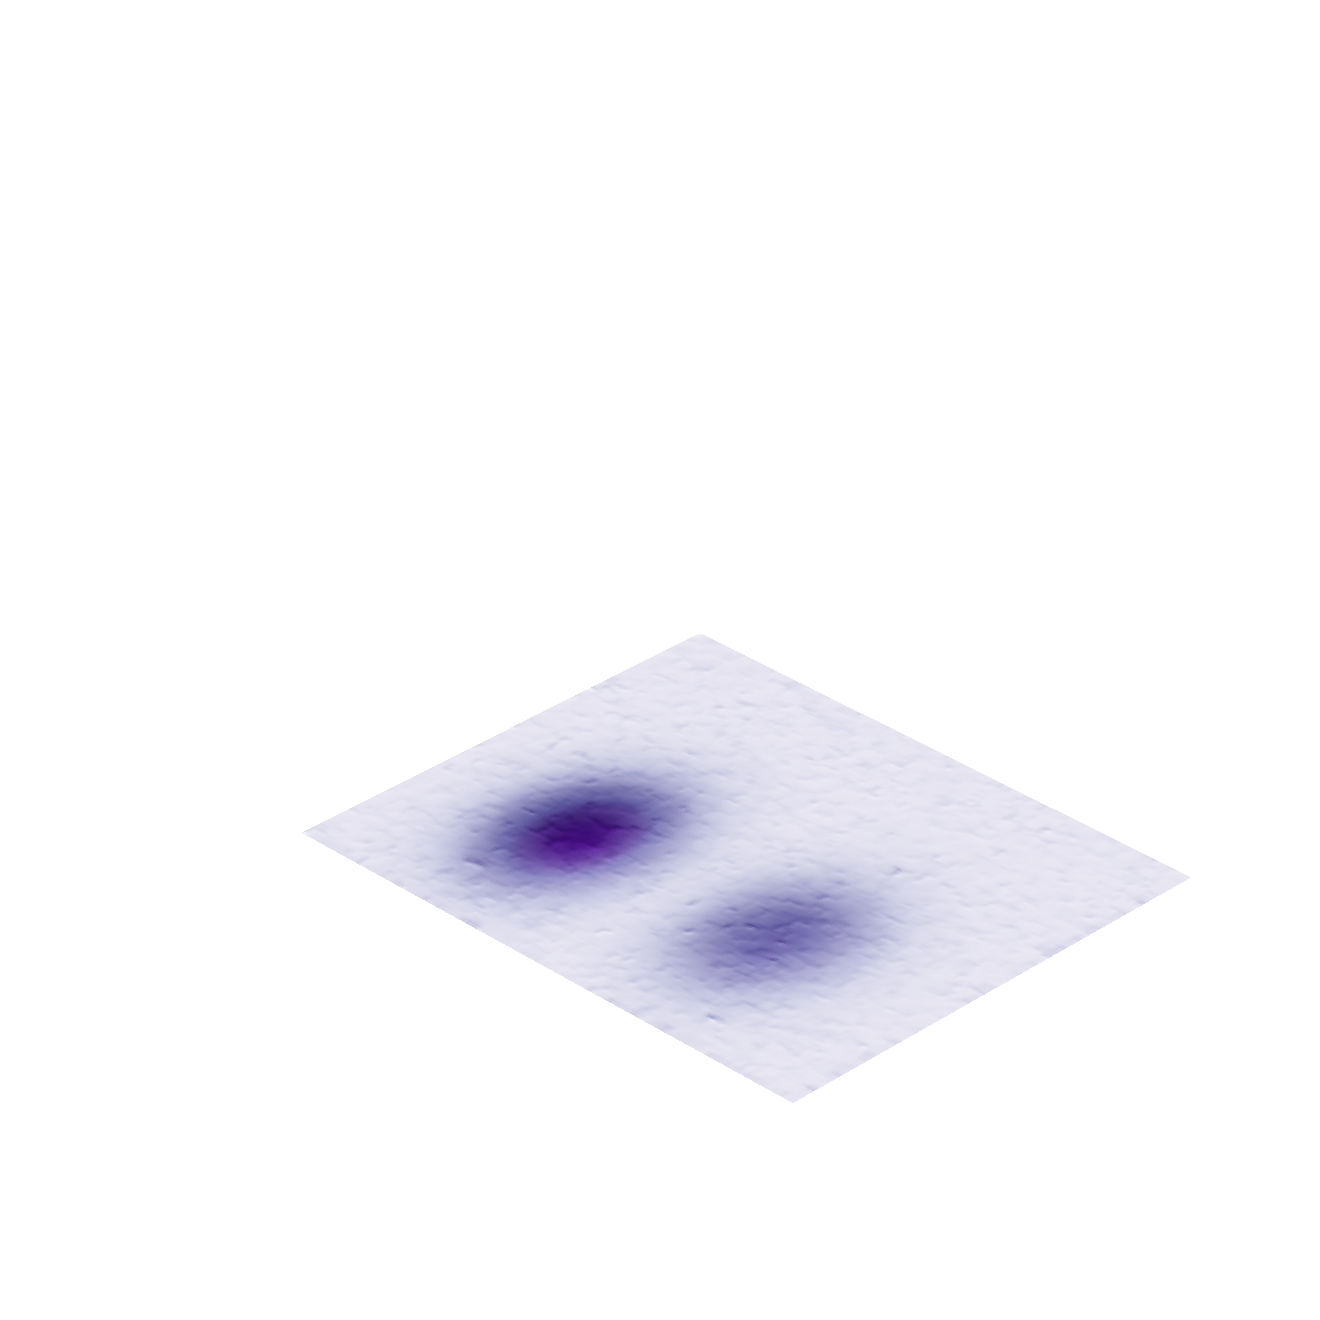

In [11]:
make_plot(gx, gy, z, azim, elev, cmap=newcmp, nlevels=256, fn='vacant')

## Figure 4

In [13]:
# Defining the colormap for the trajectory
temp = plt.get_cmap('Greens_r', 512)
newcmp_2 = col.ListedColormap(temp(np.linspace(0.25, 1., 512)))

In [14]:
# The code in this cell is adapted from David P. Sanders' colorline recipe
# https://github.com/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
# It generates the gradient line collection for the trajectory

# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''


# Data manipulation:

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
    
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False) 

In [24]:
def mc_walk(gx,gy,z,seed=105,nsteps=1000,beta = 4.,halfcut=False):
    
    #this function makes a Markov chain walker for the specific landscape
    
    np.random.seed(seed)

    xx = gx[0]
    yy = gy[:,0]
    from scipy.interpolate import RegularGridInterpolator
    interpolated = RegularGridInterpolator((xx,yy),z.T)

    d = np.zeros((nsteps,2))
    ll = np.zeros(nsteps)
    d[0] = m2
    ll[0] = interpolated(d[0])[0]

    f = 0.
    for i in range(nsteps-1):

        ## Current position
        dold = d[i]
        try:
            zold = interpolated(dold)[0]
        except:
            zold = 0.

        ## new move with PBC
        dnew = dold + np.random.normal(loc=0,scale=.1,size=2)
        
        if halfcut:
            if dnew[0] <=0:
                dnew[0] *= -1.

        try:
            znew = interpolated(dnew)[0]
        except:
            znew = 0.

        ## MH acceptance calc
        a = np.min((1.,np.exp(-beta*znew)/np.exp(-beta*zold)))
        p = np.random.uniform()
        # print(i,a,p,a<=p,dnew)
        if p <= a and dnew[0] > xx.min() and dnew[1] > yy.min() and dnew[0] < xx.max() and dnew[1] < yy.max():
            d[i+1] = dnew.copy()
            ll[i+1] = znew
            f+= 1.
        else:
            d[i+1] = dold.copy()
            ll[i+1] = zold
    print("acceptance: ",f/nsteps)

    # start = 800
    # f,a = plt.subplots(2)
    # a[0].contourf(gy,gx,z,50)
    # a[0].plot(d[start:,1],d[start:,0],'k')
    # a[1].plot(ll,'k')
    # plt.show()

    return d,ll

In [16]:
# This is the landscape for the vacant ribosome. Since the landscapes are pretty different for this
# figure, I just make them in situ instead of writing a function

# Landscape params
a1 = 11
a2 = 15

m1 = [-1.5,-1.5]
m2 = [1.5,1.5]

s1 = 0.8
s2 = 0.8

# Making the landscape
gx_2,gy_2 = np.meshgrid(np.linspace(-3.,3.,1024),np.linspace(-3.,3.,1024))
z_2 = -1.*(gaussian(gx_2,gy_2,a1,0,m1[0],m1[1],s1,s1) + 
           gaussian(gx_2,gy_2,a2,0,m2[0],m2[1],s2,s2))
z_2 += (gx_2**2 + gy_2**2)*0.35

seed = 105
factor = 0.5
noise = make_noise(gx_2,seed=seed)
z_2 -= noise*factor
z_2 -= z_2.min()-1

print(z_2.min())
print(z_2.max())

1.0
22.54587139348381


In [25]:
seed = 650
d_1,ll_1 = mc_walk(gx_2,gy_2,z_2,seed=12,nsteps=725,beta=0.18,halfcut=False)
print(d_1[-1])

acceptance:  0.9406896551724138
[-1.38738148 -1.3845702 ]


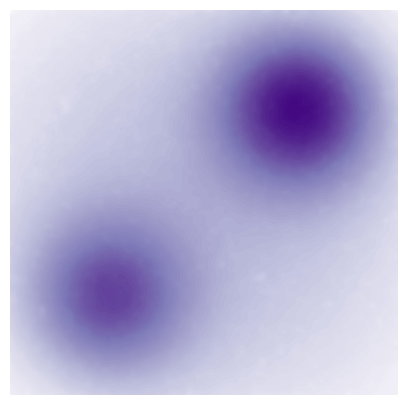

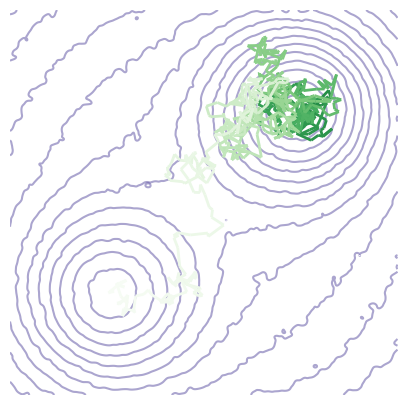

In [27]:
# I make this figure in 2 parts, the contourf as png and the lines as pdf
# Making the countourf as pdf makes a huge file that crashes everything
# Combine the two parts if you just wanna check your plot

# Part 1
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
plt.contourf(gx_2,gy_2,z_2,levels=100,cmap="Purples_r")
plt.clim(vmin = 0.5, vmax =23)
plt.savefig('vacant_flat.png', format='png', bbox_inches = 'tight')

# Part 2
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
plt.contour(gx_2,gy_2,z_2,levels=14, colors = '#1100775a')
colorline(d_1[:,0],d_1[:,1],cmap = newcmp_2, linewidth = 2,alpha = 1.)
plt.savefig('vacant_flat.pdf', format='pdf', bbox_inches = 'tight')
plt.show()


In [28]:
# This is the landscape for the enthalpic stabilization.

# Landscape params

a1 = 11
a2 = 15
a3 = 7

m1 = [-1.5,-1.5]
m2 = [1.5,1.5]
m3 = [-0.05, -0.05]

s1 = 0.8
s2 = 0.8
s3 = 0.4

# Making the landscape
gx_2,gy_2 = np.meshgrid(np.linspace(-3.,3.,1024),np.linspace(-3.,3.,1024))
z_4 = -1.*((gaussian(gx_2,gy_2,a1,0,m1[0],m1[1],s1,s1) + 
            gaussian(gx_2,gy_2,a2,0,m2[0],m2[1],s2,s2) +  
            gaussian(gx_2,gy_2,a3,0,m3[0],m3[1],s3,s3)))
z_4 += (gx_2**2 + gy_2**2)*0.3

seed = 100
factor = 0.5
noise = make_noise(gx_2,seed=seed)
z_4 -= noise*factor
z_4 -= z_4.min()-1

print(z_4.min())
print(z_4.max())

1.0
20.655785654517565


In [36]:
seed = 14
#14, 20220
d_3,ll_3 = mc_walk(gx_2,gy_2,z_4,seed=2315,nsteps=290,beta=0.18,halfcut=False)
print(d_3[-1])


acceptance:  0.9413793103448276
14
[-1.50218972 -1.56975854]


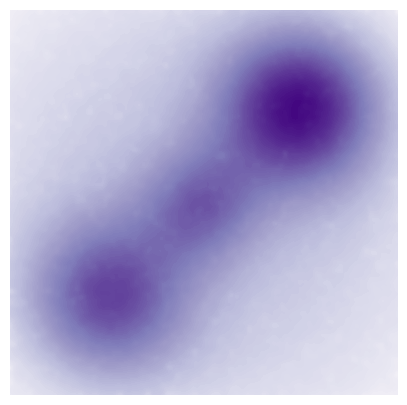

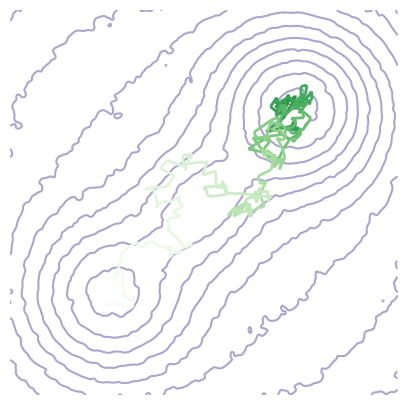

In [38]:
# Part 1
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
plt.contourf(gx_2,gy_2,z_4,levels=100,cmap="Purples_r")
plt.clim(vmin = 0.5, vmax = 23)
plt.savefig('enthalpic_flat.png', format='png', bbox_inches = 'tight')

# Part 2
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
plt.contour(gx_2,gy_2,z_4,levels=12, colors = '#1100775a')
colorline(d_3[:,0],d_3[:,1],cmap = newcmp_2, linewidth = 2,alpha = 1.)
plt.savefig('enthalpic_flat.pdf', format='pdf', bbox_inches = 'tight')
plt.show()


In [40]:
def sigmoid(x):
    # defines a well of a different type to widen the TSE
    return np.exp(1.5*(x-2.))/(np.exp(1.5*(x-2.)) + 1)

In [41]:
# This is the landscape for the enthalpic stabilization.

# Landscape params
a1 = 11
a2 = 15

m1 = [-1.6,-1.6]
m2 = [1.6,1.6]

s1 = 0.5
s2 = 0.6

# Making the landscape
gx_2,gy_2 = np.meshgrid(np.linspace(-3.,3.,1024),np.linspace(-3.,3.,1024))
z_3 = -1.*(gaussian(gx_2,gy_2,a1,0,m1[0],m1[1],s1,s1) + 
           gaussian(gx_2,gy_2,a2,0,m2[0],m2[1],s2,s2))
r = np.sqrt(gx_2**2 + gy_2**2)
z_3 += (sigmoid(r))*18/1.2

seed = 110
factor = 0.5
noise = make_noise(gx_2,seed=seed)
z_3 -= noise*factor
z_3 -= z_3.min()-1

print(z_3.min())
print(z_3.max())



1.0
22.786696389734907


In [42]:
seed =  20220
d_2,ll_2 = mc_walk(gx_2,gy_2,z_3,seed=8121,nsteps=253,beta=0.18,halfcut=False)
print(d_2[-1])

acceptance:  0.9525691699604744
20220
[-1.63045547 -1.30734816]


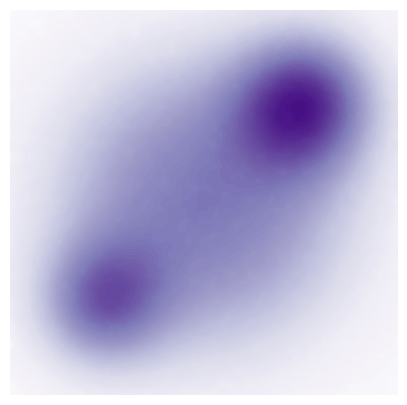

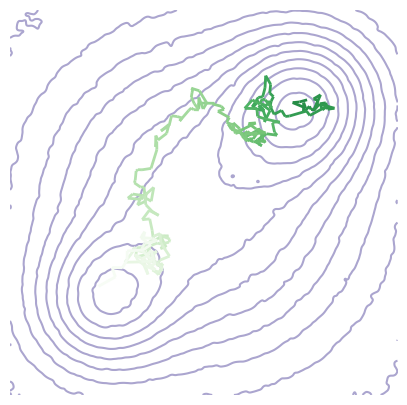

In [44]:
# Part 1
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
plt.contourf(gx_2,gy_2,z_3,levels=100,cmap='Purples_r',alpha = 1)
plt.clim(vmin = 0., vmax = 23)
plt.savefig('entropic_flat.pdf', format='pdf', bbox_inches = 'tight')
            
# Part 2
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
plt.contour(gx_2,gy_2,z_3,levels=13, colors = '#1100775a')
colorline(d_2[:,0], d_2[:,1], cmap = newcmp_2, linewidth = 2,alpha = 1.)
plt.savefig('entropic_flat.pdf', format='pdf', bbox_inches = 'tight')
plt.show()